# P value distributions in the null model
- Let's consider case-control DEG analyses, which should be a familiar topic for many dada analysts. 
- Here, I introduced expression values under multiple assumptions.
- Importantly, there is **no true DEGs** in these simulated data and we should **not** observe low P values.

In [2]:
#library
library(magrittr)
library(ggsci)
library(ggplot2)

## 1, Expression: normal distribution + Test: LM
- The simplest example

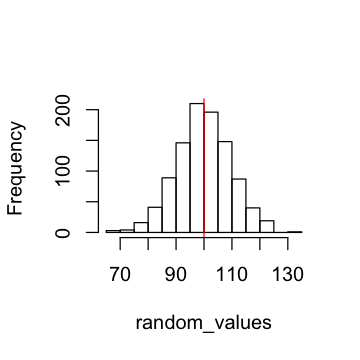

In [177]:
#generate simulation expression values
nSim <- 1000
mean <- 100
std.dev <- 10
random_values <- rnorm(nSim, mean, std.dev)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=100,col="red")

In [178]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- lm(Expression ~ case_control, data=input)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

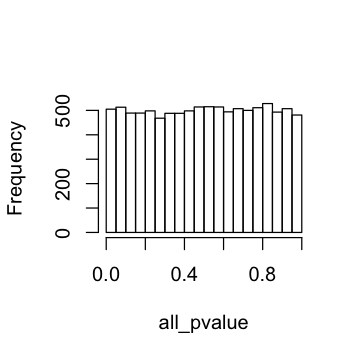

In [179]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

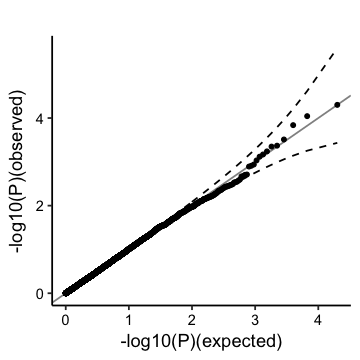

In [180]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 2, Expression: mixture of normal distribution (same S.D) + Test: LM
- LM (linear regression) is robust to type 1 error rate in this example.

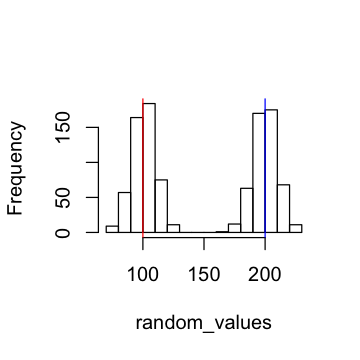

In [181]:
#generate simulation expression values
nSim <- 500
mean <- 100
std.dev <- 10
random_values1 <- rnorm(nSim, mean, std.dev)

nSim <- 500
mean <- 200
std.dev <- 10
random_values2 <- rnorm(nSim, mean, std.dev)

random_values <- c(random_values1,random_values2)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="",breaks=20)
abline(v=c(100,200),col=c("red","blue"))

In [182]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- lm(Expression ~ case_control, data=input)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

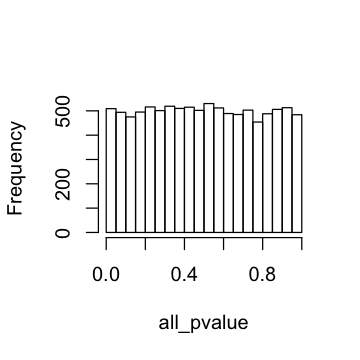

In [183]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

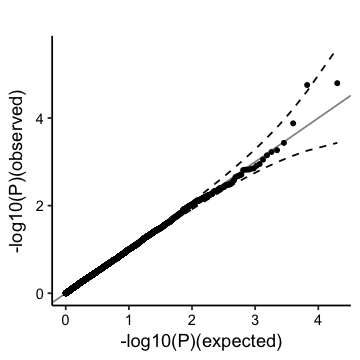

In [184]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 3, Expression: mixture of normal distribution (different S.D) + Test: LM
- LM (linear regression) is robust to type 1 error rate in this example.

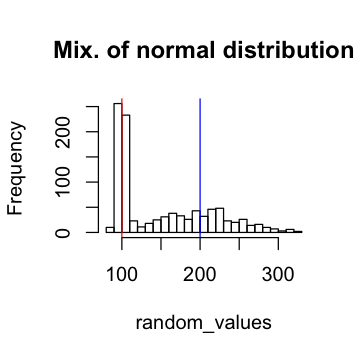

In [185]:
#generate simulation expression values
nSim <- 500
mean <- 100
std.dev <- 5
random_values1 <- rnorm(nSim, mean, std.dev)

nSim <- 500
mean <- 200
std.dev <- 50
random_values2 <- rnorm(nSim, mean, std.dev)

random_values <- c(random_values1,random_values2)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="Mix. of normal distribution",breaks=20)
abline(v=c(100,200),col=c("red","blue"))

In [186]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- lm(Expression ~ case_control, data=input)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

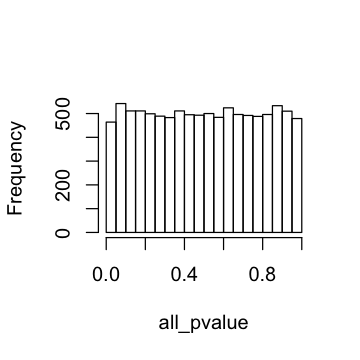

In [187]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

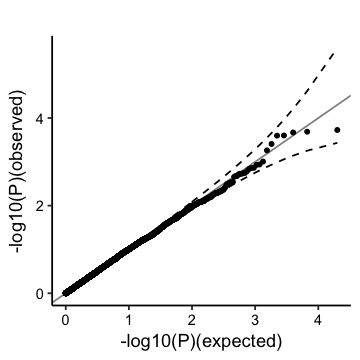

In [188]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 4, Expression: uniform distribution + Test: LM
- LM (linear regression) is robust to type 1 error rate in this example.

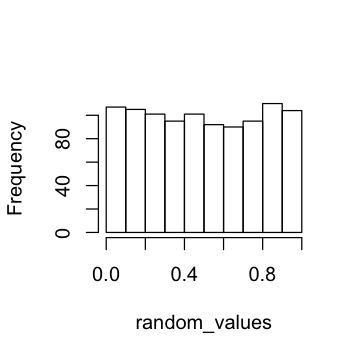

In [189]:
#generate simulation expression values
nSim <- 1000
mean <- 100
std.dev <- 10
random_values <- runif(nSim)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")

In [190]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- lm(Expression ~ case_control, data=input)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

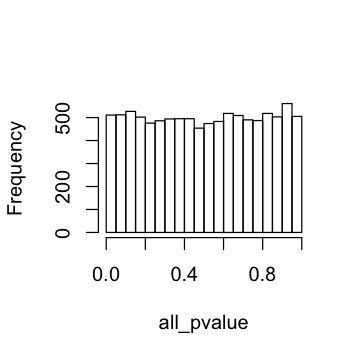

In [191]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

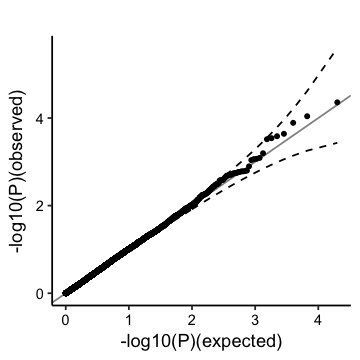

In [192]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 5, Expression: poisson distribution + Test: LM
- LM (linear regression) is robust to type 1 error rate in this example.

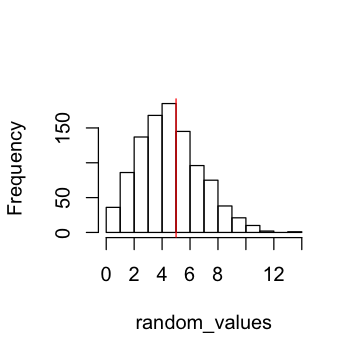

In [193]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
random_values <- rpois(nSim, lambda)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [194]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- lm(Expression ~ case_control, data=input)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

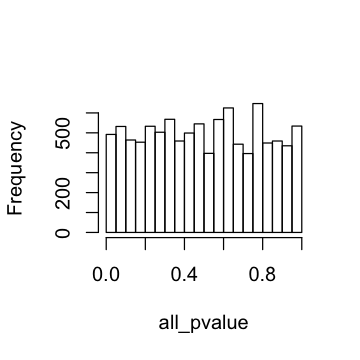

In [195]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

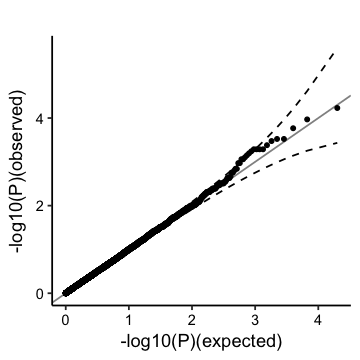

In [196]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 6, Expression: poisson distribution + Test: GLM (family=poisson)
- GLM(poisson) is the appropriate model.
- GLM(poisson) is robust to type 1 error rate in this example.

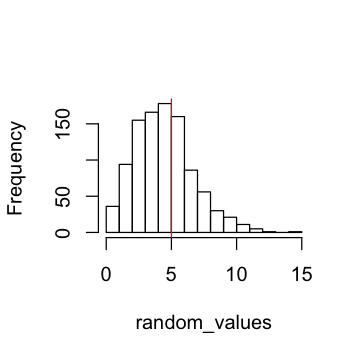

In [197]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
random_values <- rpois(nSim, lambda)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [198]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- glm(Expression ~ case_control, data=input, family=poisson)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|z|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

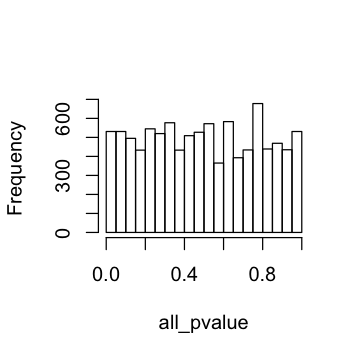

In [199]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

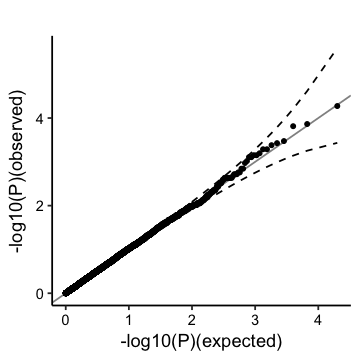

In [200]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 7, Expression: negative binomial distribution (large dispersion parameter) + Test: GLM (family=poisson)
- GLM(poisson) is **NOT** the appropriate model.
- GLM(poisson) is **nearly** robust to type 1 error rate in this example (large dispersion parameter -> very close to poisson).
- IMPORTANT MEMO: rnbinom and MASS::negative.binomial are closely related funciton

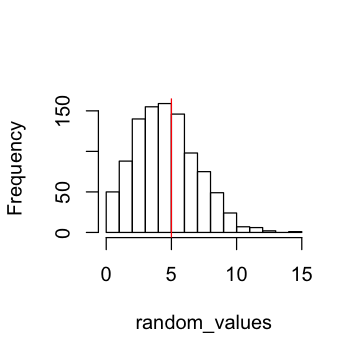

In [214]:
#generate simulation expression values
#this disbribution is very similar to poisson
nSim <- 1000
lambda <- 5
size <- 100 #this is the dispersion parameter!
random_values <- rnbinom(nSim, mu=lambda, size=size)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [215]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- glm(Expression ~ case_control, data=input, 
               family=poisson)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|z|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

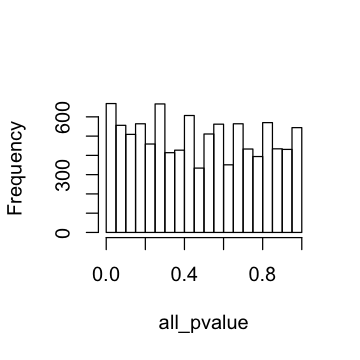

In [216]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

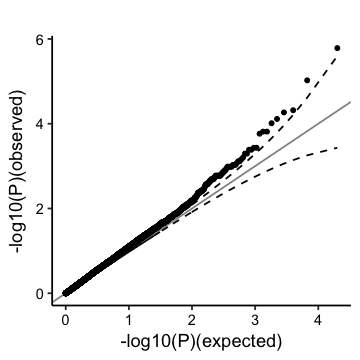

In [217]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 8, Expression: negative binomial distribution (small dispersion parameter) + Test: GLM (family=poisson)
- GLM(poisson) is **NOT** the appropriate model.
- GLM(poisson) is **NOT** robust to type 1 error rate in this example (small dispersion parameter -> very different from poisson).

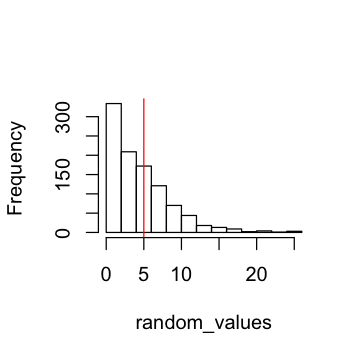

In [503]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
size <- 2 #this is the dispersion parameter!
random_values <- rnbinom(nSim, mu=lambda, size=size)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [504]:
#let'try 10000 simulated null test
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
for(i in 1:10000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- glm(Expression ~ case_control, data=input, 
               family=poisson)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|z|)"]
    all_pvalue <- c(all_pvalue,pvalue)
}

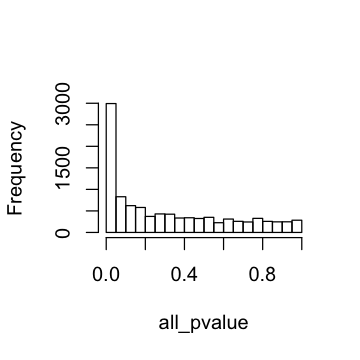

In [505]:
#distribution
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

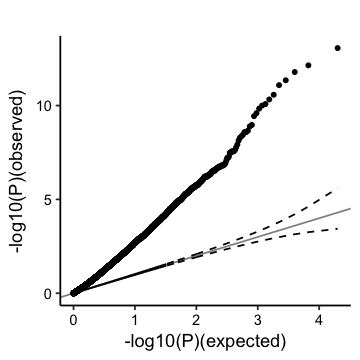

In [506]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 9, Expression: negative binomial distribution (small dispersion parameter) + Test: GLM (family=nb)
- GLM(negative binomial) is the appropriate model.
- GLM(negative binomial) is robust to type 1 error rate in this example.
- **MASS::glm.nb almost correctly estimated the dispersion parameter!!**

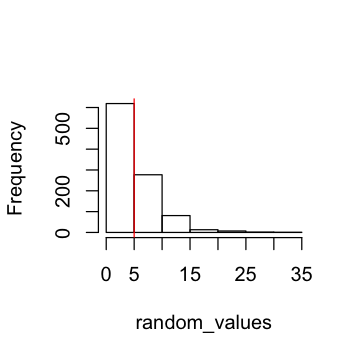

In [463]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
size <- 2 #this is the dispersion parameter!
random_values <- rnbinom(nSim, mu=lambda, size=size)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [464]:
#let'try 1000 simulated null test (reduce the test number, too slow)
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
all_theta <- c() #this new vector
for(i in 1:1000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- MASS::glm.nb(Expression ~ case_control, data=input)
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|z|)"]
    theta <- summary(fit)$theta #theta estimation by MASS::glm.nb
    all_pvalue <- c(all_pvalue,pvalue)
    all_theta <- c(all_theta, theta)
}

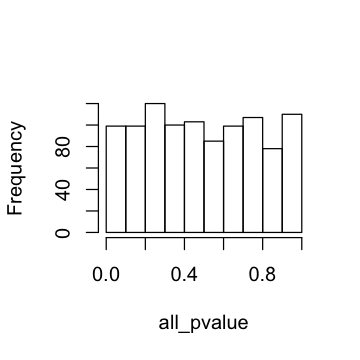

In [465]:
#distribution of p value
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

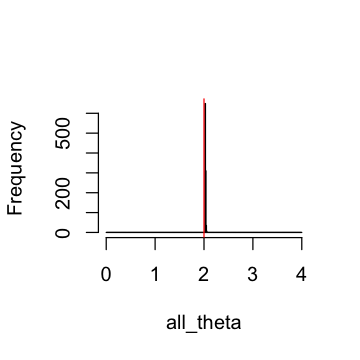

In [466]:
#distribution of theta: MASS::glm.nb almost correctly estimated theta!!
options(repr.plot.width=3, repr.plot.height=3)
hist(all_theta,main="",breaks=seq(0,4,0.01))
abline(v=size,col="red")

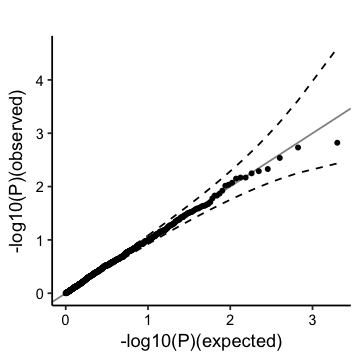

In [467]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 10, Expression: negative binomial distribution + Test: GLM (family=nb, with correct theta)
- GLM(negative binomial) is the appropriate model.
- GLM(negative binomial) with **the correct theta (overdispersion parameter)** is robust to type 1 error rate in this example.
- The specified theta in the **negative.binomial** function is just for initialization.
- The theta estimated by **negative.binomial** is not so accurate compared with **MASS::glm.nb**.

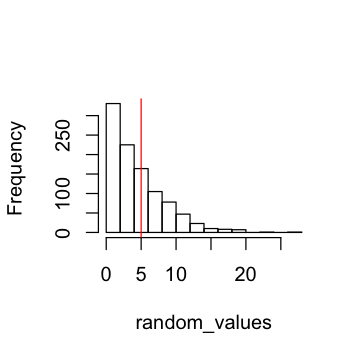

In [507]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
size <- 2 #this is the dispersion parameter!
random_values <- rnbinom(nSim, mu=lambda, size=size)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [508]:
#let'try 100 simulated null test (reduce the test number, too slow)
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
all_theta <- c() 
for(i in 1:1000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- glm(Expression ~ case_control, data=input, 
               family=negative.binomial(theta = size))
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    theta <- summary(fit)$dispersion
    all_pvalue <- c(all_pvalue,pvalue)
    all_theta <- c(all_theta,theta)
}

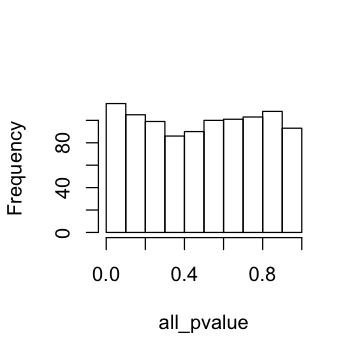

In [509]:
#distribution of p value
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

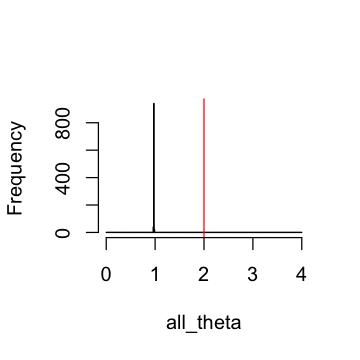

In [510]:
#distribution of theta? about the half of true value???
options(repr.plot.width=3, repr.plot.height=3)
hist(all_theta,main="",breaks=seq(0,4,0.01))
abline(v=size,col="red")

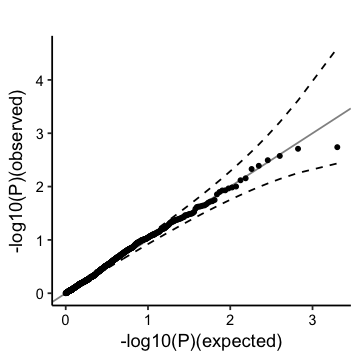

In [511]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 11, Expression: negative binomial distribution + Test: GLM (family=nb, with too large theta)
- GLM(negative binomial) is the appropriate model.
- GLM(negative binomial) with **the too large theta (overdispersion parameter)** is robust to type 1 error rate in this example.
- The theta estimated by **negative.binomial** is not so accurate compared with **MASS::glm.nb**.

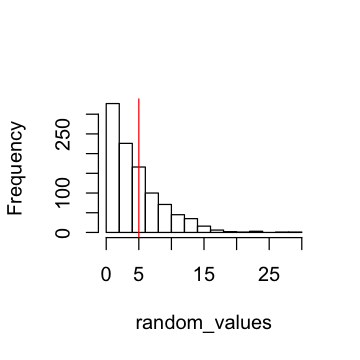

In [493]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
size <- 2 #this is the dispersion parameter!
random_values <- rnbinom(nSim, mu=lambda, size=size)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [494]:
#let'try 100 simulated null test (reduce the test number, too slow)
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
all_theta <- c() 
for(i in 1:1000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- glm(Expression ~ case_control, data=input, 
               family=negative.binomial(theta = size*10))
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    theta <- summary(fit)$dispersion
    all_pvalue <- c(all_pvalue,pvalue)
    all_theta <- c(all_theta,theta)
}


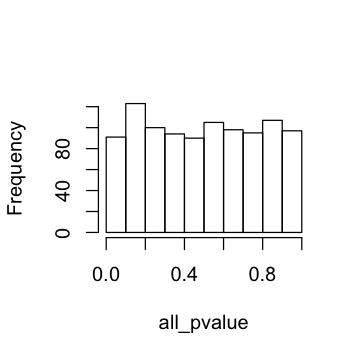

In [495]:
#distribution of p value
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

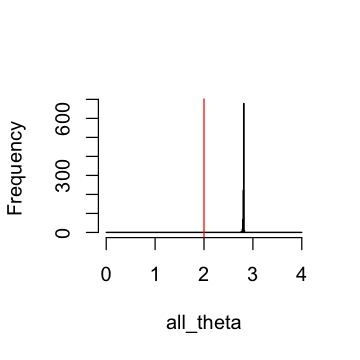

In [496]:
#distribution of theta. bit large
options(repr.plot.width=3, repr.plot.height=3)
hist(all_theta,main="",breaks=seq(0,4,0.01))
abline(v=size,col="red")

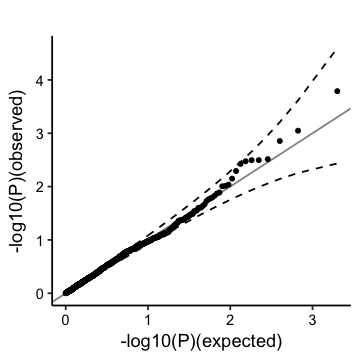

In [497]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 12, Expression: negative binomial distribution + Test: GLM (family=nb, with too small theta)
- GLM(negative binomial) is the appropriate model.
- GLM(negative binomial) with **the too small theta (overdispersion parameter)** is robust to type 1 error rate in this example.
- The theta estimated by **negative.binomial** is not so accurate compared with **MASS::glm.nb**.

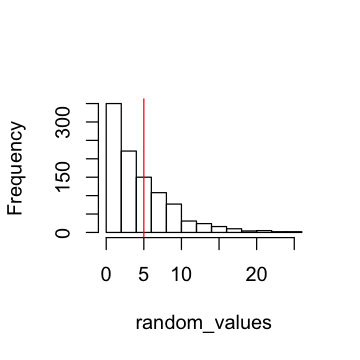

In [488]:
#generate simulation expression values
nSim <- 1000
lambda <- 5
size <- 2 #this is the dispersion parameter!
random_values <- rnbinom(nSim, mu=lambda, size=size)

options(repr.plot.width=3, repr.plot.height=3)
hist(random_values,main="")
abline(v=lambda,col="red")

In [489]:
#let'try 100 simulated null test (reduce the test number, too slow)
case_control_index <- c(rep(1,500),rep(0,500))
all_pvalue <- c()
all_theta <- c() 
for(i in 1:1000){
    case_control_index_shuffle <- sample(case_control_index) #shuffled label
    input <- data.frame(Expression=random_values, case_control=case_control_index_shuffle)
    fit <- glm(Expression ~ case_control, data=input, 
               family=negative.binomial(theta = size/10))
    pvalue <- summary(fit)$coefficient["case_control","Pr(>|t|)"]
    theta <- summary(fit)$dispersion
    all_pvalue <- c(all_pvalue,pvalue)
    all_theta <- c(all_theta,theta)
}


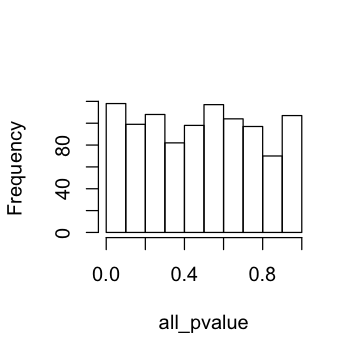

In [490]:
#distribution of p value
options(repr.plot.width=3, repr.plot.height=3)
hist(all_pvalue,main="")

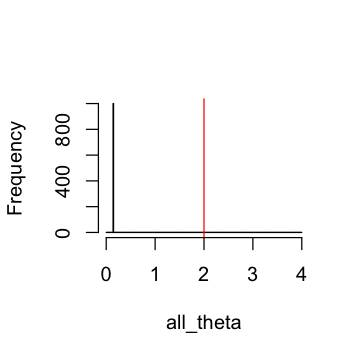

In [491]:
#distribution of theta. smaller than true value
options(repr.plot.width=3, repr.plot.height=3)
hist(all_theta,main="",breaks=seq(0,4,0.01))
abline(v=size,col="red")

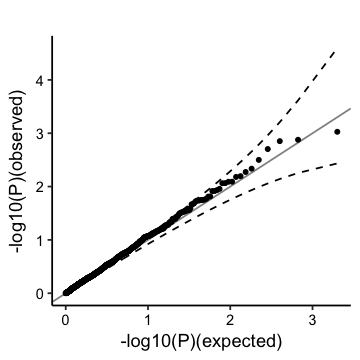

In [492]:
#QQ plot
permuted_p <- -log10(sort(all_pvalue))

n <- length(permuted_p)
ci = 0.95
expected = -log10(ppoints(n))
clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1))
cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))

df <- data.frame(observed=permuted_p,expected,clower,cupper)

options(repr.plot.width=3, repr.plot.height=3)

df %>% ggplot() +
    geom_point(aes(x=expected, y=observed), size = 1) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    geom_line(aes(expected, cupper), linetype = 2) +
    geom_line(aes(expected, clower), linetype = 2) +
    theme_bw() +
    theme(legend.title=element_blank()) +
    labs(x="-log10(P)(expected)",y="-log10(P)(observed)",title="") +
    #scale_color_manual(values=c("magenta2","deepskyblue2")) +
    scale_color_npg(name="") +
    #scale_y_continuous(limits=c(0,5)) +
    theme(strip.background = element_blank()) +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) 

## 13, contents of negative.binomial

In [405]:
negative.binomial

function (theta = stop("'theta' must be specified"), link = "log") 
{
    linktemp <- substitute(link)
    if (!is.character(linktemp)) 
        linktemp <- deparse(linktemp)
    if (linktemp %in% c("log", "identity", "sqrt")) 
        stats <- make.link(linktemp)
    else if (is.character(link)) {
        stats <- make.link(link)
        linktemp <- link
    }
    else {
        if (inherits(link, "link-glm")) {
            stats <- link
            if (!is.null(stats$name)) 
                linktemp <- stats$name
        }
        else stop(gettextf("\"%s\" link not available for negative binomial family; available links are \"identity\", \"log\" and \"sqrt\"", 
            linktemp))
    }
    .Theta <- theta
    env <- new.env(parent = .GlobalEnv)
    assign(".Theta", theta, envir = env)
    variance <- function(mu) mu + mu^2/.Theta
    validmu <- function(mu) all(mu > 0)
    dev.resids <- function(y, mu, wt) 2 * wt * (y * log(pmax(1, 
        y)/mu) - (y + .Theta) * log((y + .Theta)/(mu + .Theta)))
    aic <- function(y, n, mu, wt, dev) {
        term <- (y + .Theta) * log(mu + .Theta) - y * log(mu) + 
            lgamma(y + 1) - .Theta * log(.Theta) + lgamma(.Theta) - 
            lgamma(.Theta + y)
        2 * sum(term * wt)
    }
    initialize <- expression({
        if (any(y < 0)) stop("negative values not allowed for the negative binomial family")
        n <- rep(1, nobs)
        mustart <- y + (y == 0)/6
    })
    simfun <- function(object, nsim) {
        ftd <- fitted(object)
        rnegbin(nsim * length(ftd), ftd, .Theta)
    }
    environment(variance) <- environment(validmu) <- environment(dev.resids) <- environment(aic) <- environment(simfun) <- env
    famname <- paste("Negative Binomial(", format(round(theta, 
        4)), ")", sep = "")
    structure(list(family = famname, link = linktemp, linkfun = stats$linkfun, 
        linkinv = stats$linkinv, variance = variance, dev.resids = dev.resids, 
        aic = aic, mu.eta = stats$mu.eta, initialize = initialize, 
        validmu = validmu, valideta = stats$valideta, simulate = simfun), 
        class = "family")
}
<bytecode: 0x7f861aca5710>
<environment: namespace:MASS>